* 야구 데이터 분석을 통해 KBO 타자를 비교분석하는 프로젝트

# Q. KBO 최고의 타자는?

In [1]:
import pandas as pd

path = './데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT1)Baseball_Analysis/data/KBO_2019_player_gamestats.csv'
raw = pd.read_csv(path, encoding = 'cp949')
raw

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15306,SK,정현,1994-06-01,09-19,두산,L 4:6,8,SS,1,1,...,0,0,0.083,0.190,0.083,0.274,10,0.91,-0.26,-0.023
15307,SK,정현,1994-06-01,09-20,키움,L 1:5,8,SS,0,0,...,0,0,0.083,0.190,0.083,0.274,0,0.00,0.00,0.000
15308,SK,정현,1994-06-01,09-28,@삼성,L 7:9,9,SS,0,0,...,0,0,0.083,0.190,0.083,0.274,0,0.00,0.00,0.000
15309,SK,정현,1994-06-01,09-30,@한화,W 6:2,7,2B,1,2,...,0,0,0.079,0.200,0.079,0.279,18,0.43,0.03,0.011


In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [3]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [4]:
# 타자 데이터분석에 활용할 칼럼만 선택

columns_select = ['팀', '이름', '생일', '일자', '상대', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비']
data = raw[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


#### 선수별 기록 집계하기

In [5]:
# 피벗테이블을 이용해 선수별 주요 기록 정리

data_player = data.pivot_table(index = ['팀', '이름', '생일'], 
                               values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'], 
                              aggfunc = 'sum')
data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

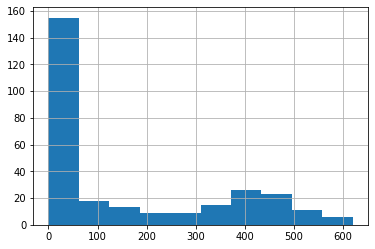

In [6]:
# 타수가 적으면 필요가 없으므로 타수 데이터의 분포 확인

data_player['타수'].hist()

* 0~50 사이에 많이 몰려 있으므로 이렇게 타수가 적은 데이터는 제외

In [7]:
# 타수가 50이상인 선수들만 선택
# reset_index()를 이용해 현재 인덱스로 설정된 데이터를 다시 칼럼으로 변경

cond = data_player['타수'] > 50
data_player = data_player[cond].reset_index()
data_player

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2
...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1


지표 | 의미 | 계산식
- | - | -
타율 | 타격에 성공해 살아나가는 정도 | = 타격 성공 횟수 / 타격 기회수 = 안타수 / 타수
출루율 | 살아서 나가는 정도 | = 진루 성공 횟수 / 진루 기회수 = (안타 + 볼넷 + 사구) / (타수 + 볼넷 + 사구 + 희비)
장타율 | 타격에 성공해 멀리 살아나가는 정도 | = 진루한 베이스 수 / 타격 기회수 = 루타 수 / 타수
OPS | 살아서 멀리 나가는 정도 | = 출루율 + 장타율

In [8]:
# 타율, 출루율, 장타율, OPS를 계산하는 함수

def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [9]:
# 데이터에 타율, 출루율, 장타율, OPS 칼럼 추가

player_stat = cal_hit(data_player)
player_stat

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.730287
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.713666
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.664995
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.632883
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6,0.262411,0.317152,0.374113,0.691266
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0,0.250000,0.284404,0.365385,0.649788
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1,0.230769,0.294574,0.435897,0.730471


In [10]:
# 출루율, 장타율, OPS, 타율 기준으로 정렬하여 KBO 최고 타자는 누구인지 확인

player_stat = player_stat.sort_values(by = ['출루율', '장타율', 'OPS', '타율'], ascending = False)
player_stat = player_stat.reset_index(drop = True)     # drop = True는 기존 인덱스를 칼럼으로 바꾸지 않는 설정
player_stat.head(20)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,1.088558
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,1.007351
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.911275
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252
5,NC,박민우,1993-02-06,203,42,9,161,471,45,1,6,0.341826,0.401515,0.430998,0.832513
6,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
7,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.397942,0.557895,0.955836
8,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,1,0.301887,0.396825,0.339623,0.736448
9,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.396127,0.514831,0.910957


* 출루율 기준으로 1등은 NC 나성범

#### 시각화

In [11]:
# seaborn, matplotlib으로 시각화 진행하기 전 데이터에 한글 들어 있을 때 아래 코드 실행

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지 한글 표시 설정

if platform.system() == 'Windows':     # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
else:     # Mac인 경우 애플고딕
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정

matplotlib.rcParams['axes.unicode_minus'] = False

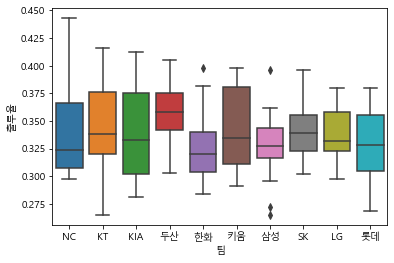

In [12]:
# 팀별 선수 출루율 분포 확인(by boxplot)

sns.boxplot(data = player_stat, x = '팀', y = '출루율')

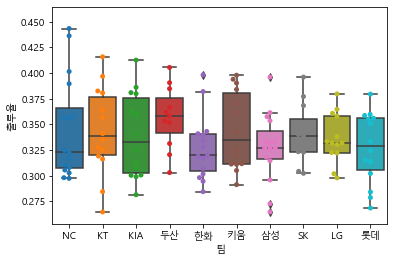

In [13]:
# 팀별 선수 출루율 분포(by swarmplot, boxplot)

sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율')

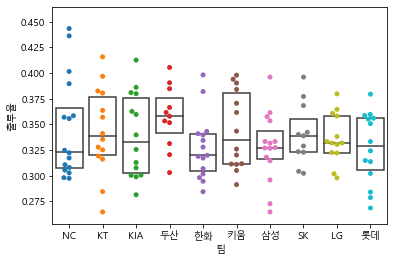

In [14]:
# swarmplot과 boxplot를 함께 사용할 경우 색이 겹쳐 구분하기 힘듦
# boxplot의 색상을 제거하고 표시하면 됨

sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율',
           showcaps = False,     # 박스 상단 가로라인 보이지 않기
           whiskerprops = {'linewidth': 0},     # 박스 상단 세로 라인 보이지 않기
           showfliers = False,     # 박스 범위 벗어난 아웃라이어 제거
           boxprops = {'facecolor': 'None'})     # 박스 색상 지우기

In [15]:
# 타자별 기록 데이터 저장
# 엑셀에서도 조회할수 있도록 encoding = 'cp949'로 저장

player_stat.to_csv('./player_stat.csv', encoding = 'cp949', index = False)

# Q. 경기 성적이 꾸준한 선수? VS 여름에 성적이 떨어지는 선수?

In [16]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


#### 월별 기록 정리

In [17]:
# 일자 칼럼에서 월에 해당하는 값만 추출하여 월 칼럼 추가

month_list = []

for monthdate in raw['일자']:
    month = monthdate.split('-')[0]
    month_list.append(month)
    
raw['월'] = month_list
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [18]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA', '월'],
      dtype='object')

In [19]:
# 분석에 활용할 칼럼 선택

columns_select = ['팀', '이름', '생일', '일자', '상대', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비', '월']

data = raw[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


In [20]:
# 피벗 테이블을 이용해 월별 실적 집계

data_player_month = data.pivot_table(index = ['팀', '이름', '생일', '월'],
                                    values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'],
                                    aggfunc = 'sum', fill_value = 0)     # fill_value = 0은 비어있는 데이터를 0으로 입력
data_player_month

루타  볼넷  사구  안타   타수  타점  홈런  희비
팀   이름  생일         월                                  
KIA 고영창 1989-02-24 04   0   0   0   0    0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3   18   0   0   0
                   04  17   3   0  13   44   6   0   0
                   05  31  10   0  24   82  10   1   2
                   06  29   8   1  24   81   8   1   0
...                    ..  ..  ..  ..  ...  ..  ..  ..
한화  호잉  1989-05-18 05  47   9   2  31  100  14   3   0
                   06  41   4   1  23   93  13   4   0
                   07  42   6   1  26   72  13   4   1
                   08  41   4   1  26   94  13   3   0
                   09   4   0   0   2   11   2   0   0

[1261 rows x 8 columns]

In [21]:
# 현재 인덱스로 정리된 팀, 이름, 생일, 월을 다시 칼럼으로 변경(인덱스로 있을 경우 나중에 선택하기가 어려움)

data_player_month = data_player_month.reset_index()
data_player_month

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,한화,호잉,1989-05-18,05,47,9,2,31,100,14,3,0
1257,한화,호잉,1989-05-18,06,41,4,1,23,93,13,4,0
1258,한화,호잉,1989-05-18,07,42,6,1,26,72,13,4,1
1259,한화,호잉,1989-05-18,08,41,4,1,26,94,13,3,0


In [22]:
# 타자의 타율, 출루율, 장타율, OPS를 계산하는 함수

def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [23]:
# data_player_month 데이터의 타자별 주요 실적 계산

player_month_stat = cal_hit(data_player_month)
player_month_stat = player_month_stat.dropna()     # 비어있는 데이터 제거
player_month_stat

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.318182,0.277778,0.595960
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.340426,0.386364,0.726789
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.361702,0.378049,0.739751
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.366667,0.358025,0.724691
5,KIA,김선빈,1989-12-18,07,18,6,0,14,39,5,1,0,0.358974,0.444444,0.461538,0.905983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,한화,호잉,1989-05-18,05,47,9,2,31,100,14,3,0,0.310000,0.378378,0.470000,0.848378
1257,한화,호잉,1989-05-18,06,41,4,1,23,93,13,4,0,0.247312,0.285714,0.440860,0.726575
1258,한화,호잉,1989-05-18,07,42,6,1,26,72,13,4,1,0.361111,0.412500,0.583333,0.995833
1259,한화,호잉,1989-05-18,08,41,4,1,26,94,13,3,0,0.276596,0.313131,0.436170,0.749302


In [24]:
# 월별 출루율 정리

month_pivot = player_month_stat.pivot_table(index = ['팀', '이름', '생일'],
                                           columns = '월',
                                           values = '출루율')
month_pivot

월                         03        04        05        06        07  \
팀   이름  생일                                                             
KIA 김선빈 1989-12-18  0.318182  0.340426  0.361702  0.366667  0.444444   
    김주찬 1981-03-25  0.272727  0.236364  0.352941  0.329114  0.431818   
    나지완 1985-05-19  0.333333  0.343750  0.200000  0.410256  0.071429   
    류승현 1997-07-01  0.000000  0.375000  0.310345  0.280702       NaN   
    문경찬 1992-07-08  0.000000       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
한화  최윤석 1987-03-28       NaN       NaN       NaN  0.400000       NaN   
    최재훈 1989-08-27  0.586207  0.343750  0.409639  0.459016  0.327869   
    최진행 1985-08-17       NaN  0.388889  0.234375  0.294118       NaN   
    하주석 1994-02-25  0.263158       NaN       NaN       NaN       NaN   
    호잉  1989-05-18  0.394737  0.310345  0.378378  0.285714  0.412500   

월                         08        09  10  
팀   이름  생일                                  
KIA 김선빈 1989-12-18  0.320000  0.386364 NaN  
    김주찬 1981-03-25  0.390244  0.333333 NaN  
    나지완 1985-05-19       NaN       NaN NaN  
    류승현 1997-07-01       NaN  0.277778 NaN  
    문경찬 1992-07-08       NaN       NaN NaN  
...                      ...       ...  ..  
한화  최윤석 1987-03-28       NaN       NaN NaN  
    최재훈 1989-08-27  0.394366  0.371795 NaN  
    최진행 1985-08-17       NaN  0.366667 NaN  
    하주석 1994-02-25       NaN       NaN NaN  
    호잉  1989-05-18  0.313131  0.181818 NaN  

[229 rows x 8 columns]

In [25]:
# 인덱스를 다시 칼럼으로 되돌리기

month_pivot = month_pivot.reset_index()
month_pivot

월,팀,이름,생일,03,04,05,06,07,08,09,10
0,KIA,김선빈,1989-12-18,0.318182,0.340426,0.361702,0.366667,0.444444,0.320000,0.386364,NaN
1,KIA,김주찬,1981-03-25,0.272727,0.236364,0.352941,0.329114,0.431818,0.390244,0.333333,NaN
2,KIA,나지완,1985-05-19,0.333333,0.343750,0.200000,0.410256,0.071429,NaN,NaN,NaN
3,KIA,류승현,1997-07-01,0.000000,0.375000,0.310345,0.280702,NaN,NaN,0.277778,NaN
4,KIA,문경찬,1992-07-08,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
224,한화,최윤석,1987-03-28,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN
225,한화,최재훈,1989-08-27,0.586207,0.343750,0.409639,0.459016,0.327869,0.394366,0.371795,NaN
226,한화,최진행,1985-08-17,NaN,0.388889,0.234375,0.294118,NaN,NaN,0.366667,NaN
227,한화,하주석,1994-02-25,0.263158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### KBO 출루율 최고타자 데이터 불러오기
* 위에서 정리한 선수별 시즌 출루율 기록 불러오기
* 가장 실적이 좋은 타자들의 월별 출루율 비교

In [26]:
# 시즌별 타자 실적 데이터 불러오기

path = './player_stat.csv'
player_stat = pd.read_csv(path, encoding = 'cp949')
player_stat.head(20)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,1.088558
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,1.007351
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.911275
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252
5,NC,박민우,1993-02-06,203,42,9,161,471,45,1,6,0.341826,0.401515,0.430998,0.832513
6,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
7,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.397942,0.557895,0.955836
8,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,1,0.301887,0.396825,0.339623,0.736448
9,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.396127,0.514831,0.910957


In [27]:
# 불러온 시즌 기록과 월별 출루율 데이터 병합
# left_on, right_on 작성시 [] 안에 들어가는 칼럼이 두개 모두 동일한 경우에는 on = [] 이렇게 써도 됨

df = pd.merge(player_stat, month_pivot, how = 'left', left_on = ['팀', '이름', '생일'], right_on = ['팀', '이름', '생일'])
# df = pd.merge(player_stat, month_pivot, how = 'left', on = ['팀', '이름', '생일'])
df.head(10)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.088558,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.007351,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.911275,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.897262,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,...,0.476764,0.882252,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789
5,NC,박민우,1993-02-06,203,42,9,161,471,45,1,...,0.430998,0.832513,NaN,0.375000,0.448276,0.344086,0.400000,0.415730,0.395062,0.500000
6,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,...,0.361930,0.760141,0.586207,0.343750,0.409639,0.459016,0.327869,0.394366,0.371795,NaN
7,키움,박병호,1986-07-10,265,85,14,133,475,107,36,...,0.557895,0.955836,0.361111,0.517647,0.377193,0.375000,0.358209,0.377193,0.406250,0.381818
8,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,...,0.339623,0.736448,0.500000,0.000000,0.545455,0.400000,0.125000,0.625000,0.166667,NaN
9,삼성,러프,1986-07-28,243,80,7,138,472,101,22,...,0.514831,0.910957,0.484848,0.407407,0.384615,0.436170,0.349398,0.376344,0.387097,NaN


In [28]:
# 출루율 실적을 기준으로 정렬하고 출루율 상위 50 데이터 가져오기

df_sort = df.sort_values(by = '출루율', ascending = False).head(50)
df_sort

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.088558,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.007351,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.911275,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.897262,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,...,0.476764,0.882252,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789
5,NC,박민우,1993-02-06,203,42,9,161,471,45,1,...,0.430998,0.832513,NaN,0.375000,0.448276,0.344086,0.400000,0.415730,0.395062,0.500000
6,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,...,0.361930,0.760141,0.586207,0.343750,0.409639,0.459016,0.327869,0.394366,0.371795,NaN
7,키움,박병호,1986-07-10,265,85,14,133,475,107,36,...,0.557895,0.955836,0.361111,0.517647,0.377193,0.375000,0.358209,0.377193,0.406250,0.381818
8,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,...,0.339623,0.736448,0.500000,0.000000,0.545455,0.400000,0.125000,0.625000,0.166667,NaN
9,삼성,러프,1986-07-28,243,80,7,138,472,101,22,...,0.514831,0.910957,0.484848,0.407407,0.384615,0.436170,0.349398,0.376344,0.387097,NaN


In [29]:
# 출루율 관련 실적만 선택

df_selected = df_sort[['팀', '이름', '출루율', '03', '04', '05', '06', '07', '08', '09', '10']]
df_selected.head()

,팀,이름,출루율,03,04,05,06,07,08,09,10
0,NC,나성범,0.443396,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
1,NC,양의지,0.436285,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
2,KT,강백호,0.415842,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
3,KIA,최형우,0.412613,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
4,두산,페르난데스,0.405488,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789


* 히트맵 작성 시에는 데이터프레임의 values 부분은 모두 숫자형 데이터로 되어 있어야 함
* 따라서 팀, 이름 칼럼은 인덱스로 지정

In [30]:
df_selected = df_selected.set_index(['팀', '이름'])
df_selected.head()

출루율        03        04        05        06        07  \
팀   이름                                                                  
NC  나성범    0.443396       NaN  0.434783  0.500000       NaN       NaN   
    양의지    0.436285  0.500000  0.416667  0.528090  0.364583  0.526316   
KT  강백호    0.415842  0.447368  0.323810  0.464286  0.456522       NaN   
KIA 최형우    0.412613  0.333333  0.361702  0.400000  0.402062  0.400000   
두산  페르난데스  0.405488  0.484848  0.449541  0.364407  0.424779  0.333333   

                 08        09        10  
팀   이름                                   
NC  나성범         NaN       NaN       NaN  
    양의지    0.441176  0.400000  0.333333  
KT  강백호    0.435294  0.383562       NaN  
KIA 최형우    0.485714  0.478261       NaN  
두산  페르난데스  0.431193  0.397590  0.315789

In [31]:
# seaborn, matplotlib으로 시각화 진행하기 전 데이터에 한글 들어 있을 때 아래 코드 실행

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지 한글 표시 설정

if platform.system() == 'Windows':     # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
else:     # Mac인 경우 애플고딕
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정

matplotlib.rcParams['axes.unicode_minus'] = False

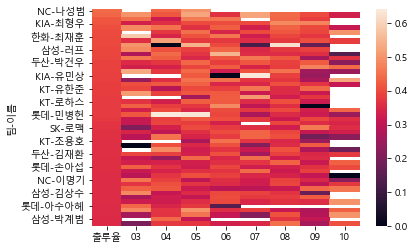

In [32]:
# 월별 출루율 히트맵

sns.heatmap(df_selected)

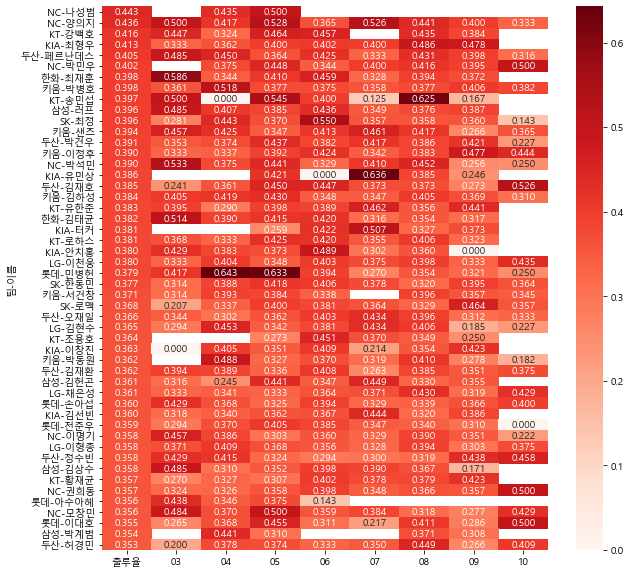

In [34]:
# 월별 출루율 실적 히트맵 크기 확대
# 출루율이 높을수록 붉은색이 진해지도록 설정

# 그림 사이즈 지정

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(data = df_selected, annot = True, fmt = '.3f', cmap = 'Reds')     
# annot = True는 실제값 출력, fmt = '.3f'는 소수점 셋째자리까지 출력, cmap은 색 지정

In [35]:
df_selected.columns

Index(['출루율', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object')

In [36]:
# 월별 출루율을 시즌 출루율 대비한 값으로 변경하여 월별 변화 정도 확인(시즌 전체 대비 월별 실적)

for col in df_selected.columns[1:]:
    df_selected[col] = df_selected[col] - df_selected['출루율']

df_selected['출루율'] = 0.0     # 출루율은 0으로 변환

df_selected.head()

출루율        03        04        05        06        07        08  \
팀   이름                                                                       
NC  나성범    0.0       NaN -0.008614  0.056604       NaN       NaN       NaN   
    양의지    0.0  0.063715 -0.019618  0.091805 -0.071702  0.090031  0.004891   
KT  강백호    0.0  0.031527 -0.092032  0.048444  0.040680       NaN  0.019453   
KIA 최형우    0.0 -0.079279 -0.050910 -0.012613 -0.010551 -0.012613  0.073102   
두산  페르난데스  0.0  0.079361  0.044053 -0.041081  0.019291 -0.072154  0.025705   

                 09        10  
팀   이름                         
NC  나성범         NaN       NaN  
    양의지   -0.036285 -0.102952  
KT  강백호   -0.032280       NaN  
KIA 최형우    0.065648       NaN  
두산  페르난데스 -0.007897 -0.089698

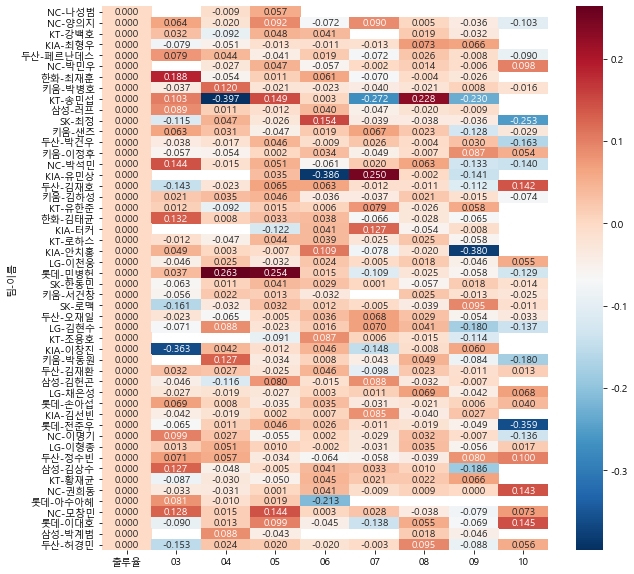

In [37]:
# 시즌 전체 대비 월별 출루율 증감 실적을 히트맵으로 표현

# 그림 사이즈 지정

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(data = df_selected.head(50), annot = True, fmt = '.3f', cmap = 'RdBu_r')

* 송민섭의 경우는 4월 성적이 가장 안 좋고 8월 성적이 가장 좋음
* 유민상의 경우는 6월 성적이 가장 안 좋고 7월 성적이 가장 좋음